In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm

In [75]:
diabetes_df = pd.read_csv('sandiegodata.org-diabetes_sae-1/data/tract_diabetes.csv')

In [76]:
diabetes_df

,geoid,asian,black,hisp,nhwhite,other,total
0,14000US06073000100,0.090034,NaN,0.240076,0.100720,0.149703,0.117236
1,14000US06073000201,0.083256,0.101111,0.093961,0.085595,0.094269,0.087723
2,14000US06073000202,0.084176,0.073590,0.096333,0.054982,0.084927,0.065198
3,14000US06073000300,0.045533,0.108271,0.086672,0.069047,0.025907,0.068951
4,14000US06073000400,0.048468,0.028781,0.045808,0.056943,0.049220,0.053447
5,14000US06073000500,0.184507,0.078628,0.090213,0.058820,0.048577,0.070201
6,14000US06073000600,0.102694,0.135190,0.086763,0.065764,0.076615,0.075425
7,14000US06073000700,0.029070,0.130407,0.145295,0.053992,0.104773,0.070044
8,14000US06073000800,0.104841,0.174138,0.102137,0.061439,0.057134,0.079953
9,14000US06073000900,0.055950,0.084946,0.099768,0.057592,0.045601,0.070037


In [77]:
food_acc_df = pd.read_csv('usda.gov-food_access-1/data/sd_food_atlas.csv')

In [78]:
food_acc_df

,geoid,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,...,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,14000US06073000100,California,San Diego,1,3029,1333,0,0,0.000000,0,...,680,2813,26,76,2,15,97,239,52,9
1,14000US06073000201,California,San Diego,1,1801,992,0,0,0.000000,0,...,395,1588,30,84,0,12,87,182,151,20
2,14000US06073000202,California,San Diego,1,4208,2245,0,64,0.015209,0,...,556,3561,112,199,4,14,318,583,51,26
3,14000US06073000300,California,San Diego,1,4732,2871,0,179,0.037828,0,...,795,3880,118,303,22,31,378,687,332,62
4,14000US06073000400,California,San Diego,1,3669,2140,0,310,0.084492,0,...,350,2821,157,364,13,19,295,572,231,77
5,14000US06073000500,California,San Diego,1,2722,1631,0,4,0.001470,0,...,275,2269,75,130,8,21,219,394,50,46
6,14000US06073000600,California,San Diego,1,3108,1862,0,84,0.027027,0,...,377,2450,121,208,5,20,304,509,146,39
7,14000US06073000700,California,San Diego,1,3754,2344,0,1,0.000266,0,...,467,3065,108,212,12,23,334,587,281,54
8,14000US06073000800,California,San Diego,1,4280,2486,0,0,0.000000,0,...,462,3075,337,226,20,31,591,903,298,152
9,14000US06073000900,California,San Diego,1,5178,2972,0,4,0.000772,0,...,625,3336,427,340,28,49,998,1534,420,120


In [79]:
#Execute this cell to drop State, County, unneccessary flags, and group quarters data
food_acc_df = food_acc_df.drop(['state', 'county', 'urban', 'ohu2010', 'groupquartersflag', 'numgqtrs', 'pctgqtrs', 'hunvflag'], axis=1)

In [80]:
#Execute this cell to drop urban/rural divided data
food_acc_df = food_acc_df.drop(['lapop1_10', 'lapop05_10', 'lapop1_20', 'lalowi1_10', 'lalowi05_10', 'lalowi1_20', 'lahalfand10', 'la1and20', 'la1and10'], axis=1)

In [81]:
#Execute this cell to drop half mile distance number (not shares) for all groups and unnecessary groups
food_acc_df = food_acc_df.drop(['lapophalf', 'lalowihalf', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lablackhalf', 'laasianhalf', 'lanhopihalf', 'laaianhalf', 'laomultirhalf', 'lahisphalf', 'lahunvhalf', 'lasnaphalf', 'lasnaphalfshare'], axis=1)

In [82]:
#Execute this cell to drop 1 mile distance number (not shares) for all groups and uneccessary groups
food_acc_df = food_acc_df.drop(['lapop1', 'lalowi1', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'lablack1', 'laasian1', 'lanhopi1', 'laaian1', 'laomultir1', 'lahisp1', 'lahunv1', 'lasnap1', 'lasnap1share'], axis=1)

In [83]:
#Execute this cell to drop 10 mile distance number (not shares) for all groups and unneccessary groups
food_acc_df = food_acc_df.drop(['lapop10', 'lalowi10', 'lakids10', 'lakids10share', 'laseniors10', 'laseniors10share', 'lawhite10', 'lablack10', 'laasian10', 'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'lasnap10', 'lasnap10share'], axis=1)

In [84]:
#Execute this cell to drop 20 mile distance number (not shares) for all groups and unneccessary groups
food_acc_df = food_acc_df.drop(['lapop20', 'lalowi20', 'lakids20', 'lakids20share', 'laseniors20', 'laseniors20share', 'lawhite20', 'lablack20', 'laasian20', 'lanhopi20', 'laaian20', 'laomultir20', 'lahisp20', 'lahunv20', 'lasnap20', 'lasnap20share'], axis=1)

In [85]:
#Execute this cell to drop all vehicle columns
food_acc_df = food_acc_df.drop(['lahunvhalfshare', 'lahunv1share', 'lahunv10share', 'lahunv20share'], axis=1)

In [86]:
#Execute this cell to drop unneccessary totals
food_acc_df = food_acc_df.drop(['tracthunv', 'tractsnap', 'tractseniors', 'tractkids'], axis=1)

In [87]:
#Execute this cell to drop low access flags
food_acc_df = food_acc_df.drop(['latracts_half', 'latracts1', 'latracts10', 'latracts20', 'latractsvehicle_20'], axis=1)

In [88]:
#Execute this cell to drop food desert flags
food_acc_df = food_acc_df.drop(['lilatracts_1and10', 'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle'], axis=1)

In [89]:
#Execute this cell to drop columns containing all 0's (ends up being all data > 1 mile distance)
#PLS NOTE THIS SOMEWHERE IN WRITE UP: no one lives more than 10 miles from supermarket
temp = food_acc_df
def remove_0_col(col):
    if food_acc_df.dtypes[col] == 'int64' and sum(food_acc_df[col]) == 0:
        print(col)
        temp.drop([col], axis=1, inplace=True)
        
for col in food_acc_df.columns:
    remove_0_col(col)
food_acc_df = temp

lapop10share
lalowi10share
lawhite10share
lablack10share
laasian10share
lanhopi10share
laaian10share
laomultir10share
lahisp10share
lapop20share
lalowi20share
lawhite20share
lablack20share
laasian20share
lanhopi20share
laaian20share
laomultir20share
lahisp20share


In [90]:
#Execute this cell to drop lowincome flag 
food_acc_df = food_acc_df.drop(['lowincometracts'], axis=1)

In [91]:
# Execute this cell to change povertyrate to a percentage to a decimal
food_acc_df['povertyrate'] = food_acc_df['povertyrate'] * .01

In [92]:
#Execute this cell to combine races and drop combined columns

food_acc_df['otherhalfshare'] = food_acc_df['lanhopihalfshare'] + food_acc_df['laaianhalfshare'] + food_acc_df['laomultirhalfshare']
food_acc_df['other1share'] = food_acc_df['lanhopi1share'] + food_acc_df['laaian1share'] + food_acc_df['laomultir1share']
food_acc_df = food_acc_df.drop(['lanhopihalfshare', 'lanhopi1share', 'laaian1share', 'laaianhalfshare', 'laomultirhalfshare', 'laomultir1share'], axis=1)

In [93]:
#Execute this cell to combine tract counts across race and drop combined columns
food_acc_df['tractother'] = food_acc_df['tractnhopi'] + food_acc_df['tractaian'] + food_acc_df['tractomultir']
food_acc_df.drop(['tractnhopi', 'tractaian', 'tractomultir'], axis=1, inplace=True)

In [94]:
#Execute this cell to rename columns
food_acc_df.columns = ['geoid', 'pop', 'povertyrate', 'medianfamilyincome', 'pophalfshare', 'lowincomehalfshare', 'whitehalfshare',
                      'blackhalfshare', 'asianhalfshare', 'hispanichalfshare', 'pop1share', 'lowincome1share', 'white1share', 
                       'black1share', 'asian1share', 'hispanic1share', 'tractlowincome', 'tractwhite', 'tractblack', 'tractasian', 
                       'tracthispanic', 'otherhalfshare', 'other1share', 'tractother']

In [95]:
#Proof that the geoids match across datasets *in order*
(diabetes_df['geoid'] == food_acc_df['geoid']).all()

True

In [96]:
#Execute this to combine the datasets
df = food_acc_df
df['asian_diabetes'] = diabetes_df['asian']
df['black_diabetes'] = diabetes_df['black']
df['hispanic_diabetes'] = diabetes_df['hisp']
df['white_diabetes'] = diabetes_df['nhwhite']
df['other_diabetes'] = diabetes_df['other']
df['total_diabetes'] = diabetes_df['total']

In [97]:
#End of Robin's bullshit
df.columns

Index(['geoid', 'pop', 'povertyrate', 'medianfamilyincome', 'pophalfshare',
       'lowincomehalfshare', 'whitehalfshare', 'blackhalfshare',
       'asianhalfshare', 'hispanichalfshare', 'pop1share', 'lowincome1share',
       'white1share', 'black1share', 'asian1share', 'hispanic1share',
       'tractlowincome', 'tractwhite', 'tractblack', 'tractasian',
       'tracthispanic', 'otherhalfshare', 'other1share', 'tractother',
       'asian_diabetes', 'black_diabetes', 'hispanic_diabetes',
       'white_diabetes', 'other_diabetes', 'total_diabetes'],
      dtype='object')

In [98]:
#drop last row b/c all empty
df = df.drop(627)
df.head()

,geoid,pop,povertyrate,medianfamilyincome,pophalfshare,lowincomehalfshare,whitehalfshare,blackhalfshare,asianhalfshare,hispanichalfshare,...,tracthispanic,otherhalfshare,other1share,tractother,asian_diabetes,black_diabetes,hispanic_diabetes,white_diabetes,other_diabetes,total_diabetes
0,14000US06073000100,3029,0.040,152500,1.000000,0.105561,0.928689,0.008584,0.025091,0.078904,...,239,0.037636,0.012605,114,0.090034,NaN,0.240076,0.100720,0.149703,0.117236
1,14000US06073000201,1801,0.046,150938,0.384241,0.062771,0.351579,0.007000,0.008564,0.037562,...,182,0.017098,0.000080,99,0.083256,0.101111,0.093961,0.085595,0.094269,0.087723
2,14000US06073000202,4208,0.047,102404,0.472983,0.067705,0.402836,0.013804,0.018560,0.069494,...,583,0.037782,0.000000,336,0.084176,0.073590,0.096333,0.054982,0.084927,0.065198
3,14000US06073000300,4732,0.153,85221,0.129704,0.030660,0.110512,0.003396,0.007318,0.019654,...,687,0.008478,0.000000,431,0.045533,0.108271,0.086672,0.069047,0.025907,0.068951
4,14000US06073000400,3669,0.119,76827,0.124007,0.031031,0.095519,0.006486,0.009420,0.024597,...,572,0.012582,0.000000,327,0.048468,0.028781,0.045808,0.056943,0.049220,0.053447


In [99]:
df.iloc[0]

geoid                 14000US06073000100
pop                                 3029
povertyrate                         0.04
medianfamilyincome                152500
pophalfshare                           1
lowincomehalfshare              0.105561
whitehalfshare                  0.928689
blackhalfshare                0.00858369
asianhalfshare                 0.0250908
hispanichalfshare              0.0789039
pop1share                       0.291652
lowincome1share                 0.037027
white1share                     0.268211
black1share                   0.00260924
asian1share                   0.00822724
hispanic1share                 0.0231245
tractlowincome                       289
tractwhite                          2813
tractblack                            26
tractasian                            76
tracthispanic                        239
otherhalfshare                 0.0376362
other1share                     0.012605
tractother                           114
asian_diabetes  

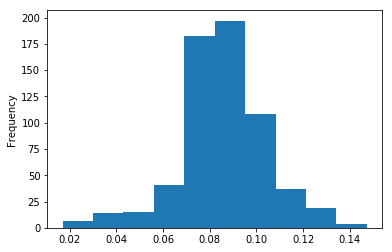

In [100]:
df['total_diabetes'].plot.hist()

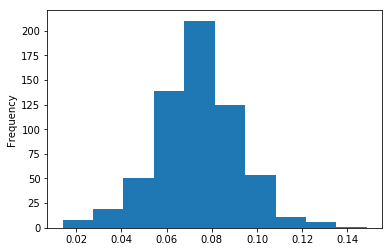

In [101]:
df['white_diabetes'].plot.hist()

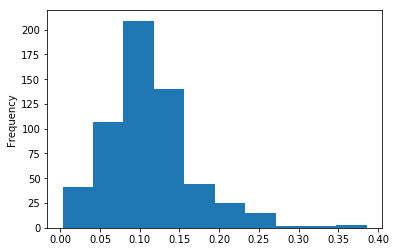

In [102]:
df['black_diabetes'].plot.hist()

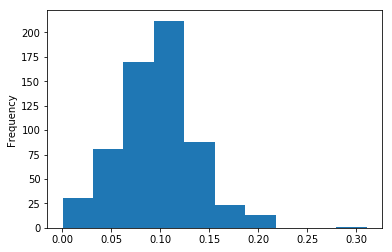

In [103]:
df['asian_diabetes'].plot.hist()

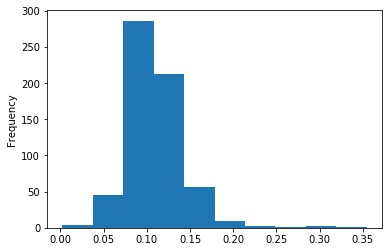

In [104]:
df['hispanic_diabetes'].plot.hist()

In [105]:
print("white pop:", sum(df['tractwhite'])/sum(df['pop']))
print("black pop:", sum(df['tractblack'])/sum(df['pop']))
print("asian pop:", sum(df['tractasian'])/sum(df['pop']))
print("hispanic pop:", sum(df['tracthispanic'])/sum(df['pop']))
print("other pop:", sum(df['tractother'])/sum(df['pop']))

# TODO (from Alia): why is this coming out to over 100%????

white pop: 0.6401426931622101
black pop: 0.05111373227844809
asian pop: 0.10858061850287838
hispanic pop: 0.3202739109098175
other pop: 0.20016295605646342


In [106]:
df_pop_counts = df[['pop']].copy()
df_pop_counts['%whitehalf'] = [(x['whitehalfshare']*x['tractwhite'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%blackhalf'] = [(x['blackhalfshare']*x['tractblack'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%asianhalf'] = [(x['asianhalfshare']*x['tractasian'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%hispanichalf'] = [(x['hispanichalfshare']*x['tracthispanic'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%otherhalf'] = [(x['otherhalfshare']*x['tractother'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts


,pop,%whitehalf,%blackhalf,%asianhalf,%hispanichalf,%otherhalf
0,3029,0.862464,0.000074,0.000630,0.006226,0.001416
1,1801,0.309999,0.000117,0.000399,0.003796,0.000940
2,4208,0.340898,0.000367,0.000878,0.009628,0.003017
3,4732,0.090614,0.000085,0.000469,0.002853,0.000772
4,3669,0.073442,0.000278,0.000935,0.003835,0.001121
5,2722,0.034302,0.000015,0.000058,0.000518,0.000141
6,3108,0.005662,0.000000,0.000024,0.000150,0.000081
7,3754,0.200992,0.000337,0.000683,0.007624,0.002887
8,4280,0.012791,0.000003,0.000009,0.000593,0.000158
9,5178,0.000000,0.000000,0.000000,0.000000,0.000000


In [107]:
# start of Alia's part

In [108]:
## Plot race vs diabetes rates ##

In [109]:
def get_total_diabetes_rate_for_race(race):
    race_pop_col_name = 'tract' + race
    race_diabetes_rate_col_name = race + '_diabetes'
    
    # for each row, multiply pop * diabetes rate to get total, add to sum
    num_with_diabetes = df[race_pop_col_name] * df[race_diabetes_rate_col_name]
    total_race_with_diabetes_count = num_with_diabetes.sum()
    # use .sum() on the pop column to get total pop of the race
    total_race_count = df[race_pop_col_name].sum()
    # return calculated sum / .sum()
    return total_race_with_diabetes_count / total_race_count    

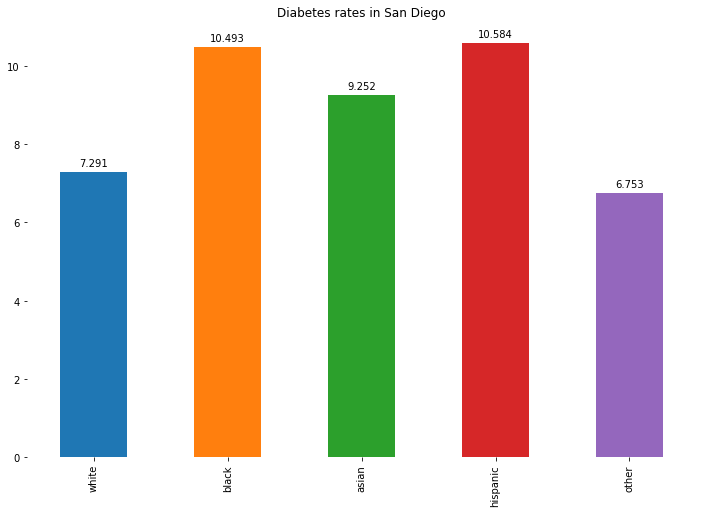

In [110]:
race_labels = ['white','black', 'asian', 'hispanic', 'other']
diabetes_rates = [float("{0:.3f}".format(get_total_diabetes_rate_for_race(r)*100)) for r in race_labels]

# adapted from stack overflow post:
# https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
plt.figure(figsize=(12, 8))
ax = pd.Series(diabetes_rates).plot(kind='bar')
ax.set_title('Diabetes rates in San Diego')
ax.set_xticklabels(race_labels)

rects = ax.patches

frequency_labels = [str(r) for r in diabetes_rates]

# add labels to bars
for rect, label in zip(rects, frequency_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .1, label,
            ha='center', va='bottom')

# remove the outline
plt.box(False)
    
# plt.bar(range(1,6), diabetes_rates, width=.5, tick_label=labels)

In [111]:
## Plot distance to nearest supermarket > 1 mile vs race ##

In [123]:
## plot poverty rate vs diabetes rate
# NOTE FOR WRITE UP: there is clearly not a very strong correlation here lol

y intercept:	 0.08468
slope:		 0.00745


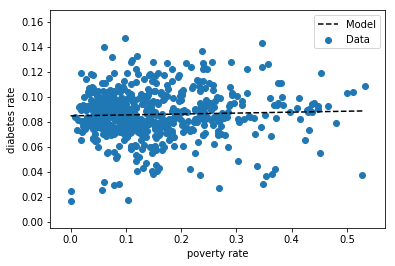

In [133]:
# modified from COGS108 tutorial 14-LinearModels
outcome, predictors = patsy.dmatrices('total_diabetes ~ povertyrate', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

plt.scatter(df['povertyrate'], df['total_diabetes'], label='Data')

xs = np.arange(df['povertyrate'].min(), df['povertyrate'].max(), 0.01)
ys = res.params[1] * xs + res.params[0]
plt.plot(xs, ys, '--k', label='Model')

print('y intercept:\t', "{0:.5f}".format(res.params[0]))
print('slope:\t\t', "{0:.5f}".format(res.params[1]))

plt.xlabel('poverty rate')
plt.ylabel('diabetes rate')
plt.legend()

In [ ]:
## plot median family income vs diabetes rates ##
# NOTE FOR WRITE UP: there is clearly not a very strong correlation here either lol

y intercept:	 0.08795
slope:		 -0.0000000277


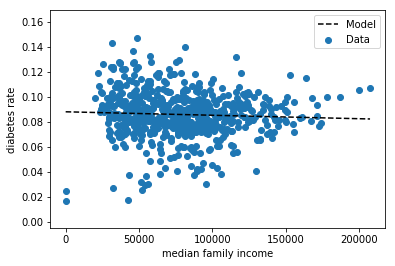

In [135]:
# modified from COGS108 tutorial 14-LinearModels
outcome, predictors = patsy.dmatrices('total_diabetes ~ medianfamilyincome', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

plt.scatter(df['medianfamilyincome'], df['total_diabetes'], label='Data')

xs = np.arange(df['medianfamilyincome'].min(), df['medianfamilyincome'].max(), 0.01)
ys = res.params[1] * xs + res.params[0]
plt.plot(xs, ys, '--k', label='Model')

print('y intercept:\t', "{0:.5f}".format(res.params[0]))
print('slope:\t\t', "{0:.5f}".format(res.params[1]))

plt.xlabel('median family income')
plt.ylabel('diabetes rate')
plt.legend()